[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/Machine_Learning_3rd_edition/blob/master/Volume_II_Python/Part-2-ML_sklearn/5-02-Linear_regression.ipynb)

# Linear Regression
## Vehicle data

This notebook provides an example of regression with sklearn with a used car data set provided by [Austin Reese](https://github.com/AustinReese) 

The data was downloaded from Kaggle on 4/287/2025 from this link: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

The data set is available in the data folder, renamed as *vehicles.csv*

We will read the cleaned data as a pickle file from Notebook 5-02a. 


### Code Accompanying ***The Machine Learning Handbooks***, Volume II, Chapter 5

#### Book pdf is available on the GitHub repo: <https://github.com/kjmazidi/Machine_Learning_3rd_edition>

###### (c) 2025 KJG Mazidi, all rights reserved

In [34]:
# imports used in this notebook

import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors

### Data description

The preprocessed dataset contains a little over 44K rows and 12 columns. Experimentally we will determine which of these columns are useful for regression.

* price (in US dollars)
* year
* manufacturer
* model
* condition
* cylinders
* fuel type
* odometer
* transmission
* type
* paint_color
* state

In [97]:
### load the preprocessed pickle data frame

df = pd.read_pickle('data/vehicles_small.p')  
print('Data dimentsion:', df.shape)
df.head()

Data dimentsion: (44740, 12)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,state
0,22590.0,2010,5,silverado 1500,2,6,gas,71229,other,1,blue,al
1,15000.0,2013,8,f-150 xlt,0,5,gas,128000,automatic,3,black,al
2,24590.0,2017,5,silverado 1500 regular,2,5,gas,40784,other,1,white,al
3,22590.0,2017,20,1500 regular cab tradesman,2,6,gas,39508,other,1,white,al
4,19900.0,2004,8,f250 super duty,2,6,diesel,88000,automatic,1,blue,al


In [80]:
df.dtypes

price           float64
year              int64
manufacturer       int8
model            object
condition          int8
cylinders          int8
fuel             object
odometer          int64
transmission     object
type             object
paint_color      object
state            object
dtype: object

### Data Exploration

Now let's try to figure out which columns might be good predictors of vehicle price. 

Looking at the numberic predictors:

* odometer has a small negative correlation
* year has a somewhat small positive correlation


In [82]:
# correlation

df[['price', 'odometer', 'year']].corr()

,price,odometer,year
price,1.000000,-0.168473,0.250205
odometer,-0.168473,1.000000,-0.147275
year,0.250205,-0.147275,1.000000


No one predictor seems to be a standout. Let's start with year for simple linear regression. 

## Simple Linear Regression

X is year, y is price

In [83]:
# make sure X is a data frame

X = df.year.to_frame()
y = df.price

In [84]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (35792, 1)
test size: (8948, 1)


In [85]:
# train the algorithm

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.0612959596853917

In [86]:
# make predictions

y_pred = linreg.predict(X_test)

In [96]:
# evaluation

print('mse=', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

mse= 23400130.625396784
R2 Score:  0.1858534284236939


This is a very poor correlation result. Our data analysis showed a 0.25 correlation between yar and price. This correlation is essentially 0, meaning no correlation. The model was not able to learn well from the data. 

On a more positive note, the mean squared error indicates that the predicted car price would be off by about $5k which is not bad for one predictor. 

## Multiple Linear Regression

Let's add more predictors to the data this time. 

In [98]:
# predictors are 1-year, 2-manufacturer, 4-conditon, 5-cylinders, 7-odometer, 9-type

X = df.iloc[:, [1,2,4,5,7,9]]
y = df.iloc[:, 0]

In [99]:
X.head()

,year,manufacturer,condition,cylinders,odometer,type
0,2010,5,2,6,71229,1
1,2013,8,0,5,128000,3
2,2017,5,2,5,40784,1
3,2017,20,2,6,39508,1
4,2004,8,2,6,88000,1


In [100]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (35792, 6)
test size: (8948, 6)


In [101]:
# train the algorithm

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.16775890471595045

In [102]:
y_pred = linreg.predict(X_test)

In [103]:
# evaluation

print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 23359131.93868797
correlation= 0.18727987089777498


In [104]:
# try knn


# train the algorithm
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [105]:
y_pred = regressor.predict(X_test)
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 19192033.58325883
correlation= 0.3322631999998693


<Axes: xlabel='price'>

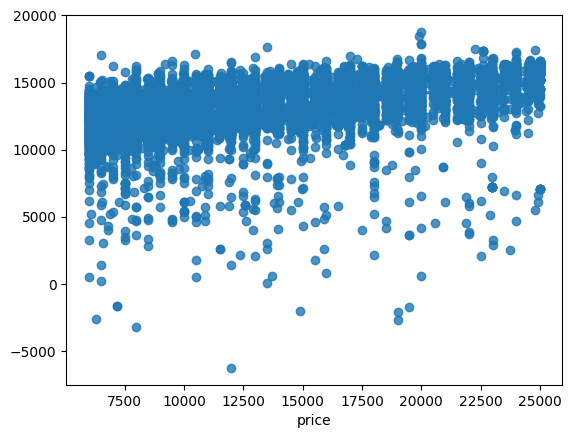

In [94]:
sb.regplot(x=y_test, y=y_pred)

In [226]:
# ridge regression
# 
reg = linear_model.Ridge(alpha=.5)

In [227]:
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.3079485396751901

In [228]:
# Bayesian ridge

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.30794275395341975

In [233]:
reg = NearestNeighbors(n_neighbors=2)
reg.fit(X_train, y_train)


NearestNeighbors(n_neighbors=2)

In [234]:
y_pred = linreg.predict(X_test)

# evaluation

print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))


mse= 26.69962352281666
correlation= 0.3031469628604332


<Axes: xlabel='Pct'>

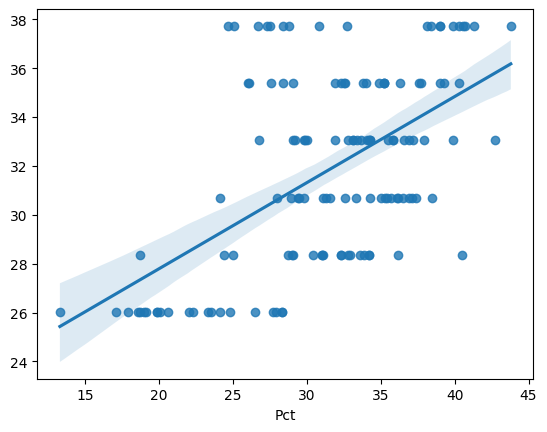

In [235]:
sb.regplot(x=y_test, y=y_pred)